In [1]:
from bs4 import BeautifulSoup             
import os
import re
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt


import gensim
from gensim import models
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)

from gensim.corpora import Dictionary

In [2]:
 def cm_to_inch(value):
    return value/2.54

In [3]:
stemmer = SnowballStemmer('english')
stops = set(stopwords.words("english"))

def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def lyric_to_words( raw_lyric ):
    lyric_text = BeautifulSoup(raw_lyric, features="lxml").get_text() 
    letters_only = re.sub("[^a-zA-Z]", " ", lyric_text) 
    words = letters_only.lower().split()                                               
    meaningful_words = [w for w in words if not w in stops]
    lemmatize_stemming_words = [lemmatize_stemming(w) for w in words] 

    return lemmatize_stemming_words
    # return( " ".join( meaningful_words ))

In [4]:
data_set = pd.read_csv("tcc_ceds_music.csv", delimiter=",")
data_set = data_set.drop(["dating", "violence", "world/life", "night/time", "family/gospel", "shake the audience", "dating", "violence", "world/life", "sadness", "feelings", "danceability", "loudness",	"acousticness",	"instrumentalness",	"valence",	"energy", "topic", "romantic",	"communication",	"obscene",	"music",	"movement/places",	"light/visual perceptions",	"family/spiritual",	"like/girls", "age"], axis=1)
data_set.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48


In [5]:
%%time
processed_lyrics = data_set['lyrics'].map(lyric_to_words)

CPU times: user 23.2 s, sys: 123 ms, total: 23.4 s
Wall time: 23.4 s


In [6]:
data_set['processed_lyrics'] = processed_lyrics

In [7]:
%%time
dictionary = Dictionary(processed_lyrics)

CPU times: user 913 ms, sys: 51 µs, total: 913 ms
Wall time: 913 ms


In [8]:
%%time
dictionary.filter_extremes(no_below=15, no_above=0.25, keep_n=100000)

CPU times: user 35 ms, sys: 0 ns, total: 35 ms
Wall time: 34.6 ms


In [9]:
%%time
corpus = [dictionary.doc2bow(lyric) for lyric in processed_lyrics]

CPU times: user 485 ms, sys: 32.5 ms, total: 517 ms
Wall time: 517 ms


In [25]:
%%time
lda_model = gensim.models.LdaMulticore(corpus, num_topics=13, id2word=dictionary, passes=100)

/home/gabriel/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
CPU times: user 2min 25s, sys: 11.8 s, total: 2min 37s
Wall time: 2min 37s


In [26]:
topics = [sorted(lda_model[c], key=lambda tup: -1*tup[1])[0][0] for c in corpus]
data_set["topics"] = topics

/home/gabriel/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
data_set.to_csv("tcc_ceds_music_topics.csv", index=0)

/home/gabriel/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.038*"world" + 0.034*"dream" + 0.026*"believ" + 0.018*"true" + 0.014*"thing" + 0.014*"love" + 0.013*"wish" + 0.012*"life" + 0.011*"forev" + 0.011*"hold"
Topic: 1 
Words: 0.052*"head" + 0.030*"dead" + 0.025*"play" + 0.024*"shoot" + 0.023*"hand" + 0.014*"bring" + 0.013*"hell" + 0.013*"game" + 0.010*"stick" + 0.009*"dirti"
Topic: 2 
Words: 0.026*"fuck" + 0.023*"nigga" + 0.019*"shit" + 0.017*"bitch" + 0.013*"yeah" + 0.013*"caus" + 0.007*"real" + 0.007*"tell" + 0.007*"wanna" + 0.006*"think"
Topic: 3 
Words: 0.095*"babi" + 0.080*"yeah" + 0.059*"want" + 0.050*"gonna" + 0.042*"hold" + 0.042*"wanna" + 0.038*"girl" + 0.025*"need" + 0.018*"love" + 0.018*"right"
Topic: 4 
Words: 0.055*"go" + 0.028*"money" + 0.016*"caus" + 0.015*"bout" + 0.014*"nothin" + 0.013*"comin" + 0.011*"thing" + 0.011*"goin" + 0.011*"lookin" + 0.010*"talkin"
Topic: 5 
Words: 0.049*"black" + 0.036*"woman" + 0.034*"fight" + 0.028*"kill" + 0.021*"white" + 0.017*"devil" + 0.017*"miss" + 0.016*"follow" + 0.013*"

In [29]:
import pyLDAvis.gensim_models

lda_display = pyLDAvis.gensim_models.prepare(
    lda_model,
    corpus,
    dictionary,
    sort_topics=False,
)


/home/gabriel/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
pyLDAvis.save_html(lda_display, 'lda.html')


/home/gabriel/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
pyLDAvis.display(lda_display)

/home/gabriel/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_lyrics, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\\nCoherence Score: ', coherence_lda)

/home/gabriel/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
\nCoherence Score:  0.39756657381214927


In [ ]:

def compute_coherence_values(limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaMulticore(corpus, num_topics=num_topics, id2word=dictionary, passes=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=processed_lyrics, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        print(num_topics)

    return model_list, coherence_values

limit=15
start=12
step=1
model_list, coherence_values = compute_coherence_values(start=start, limit=limit, step=step)



In [ ]:
# Show graph
limit=15
start=12
step=1
x = range(start, limit, step)
plt.plot(x, coherence_values, label="coherence values")
plt.xlabel("Num Topics")
plt.legend()
plt.legend()
plt.grid()
plt.show()

In [40]:
decadas = [item for item in range(1950, 2020, 10)]
topic_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"]

/home/gabriel/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/home/gabriel/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


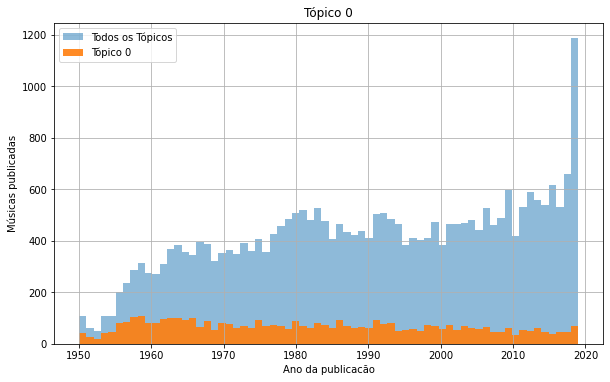

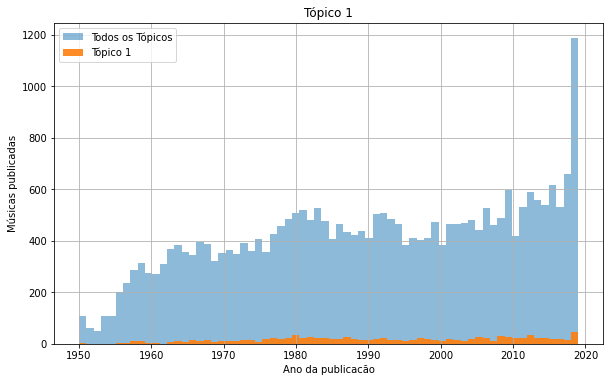

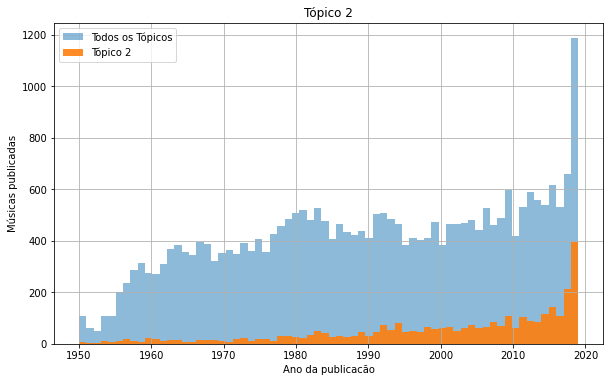

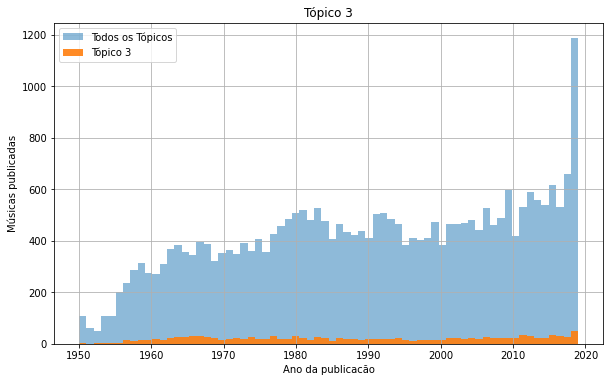

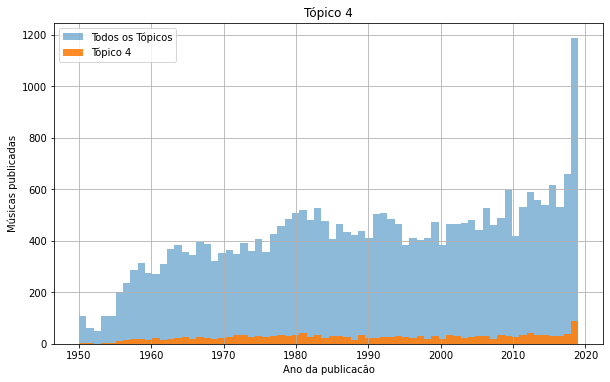

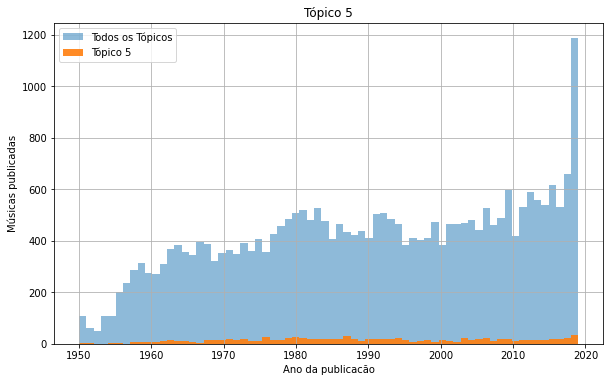

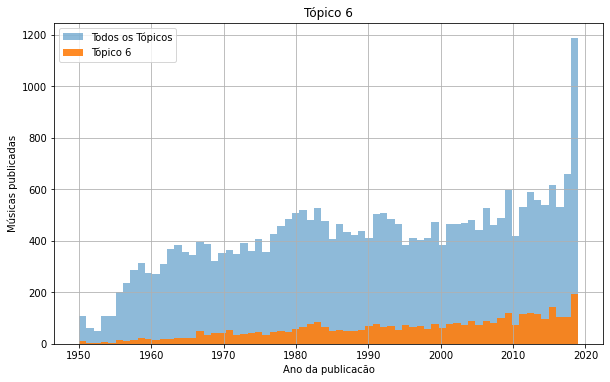

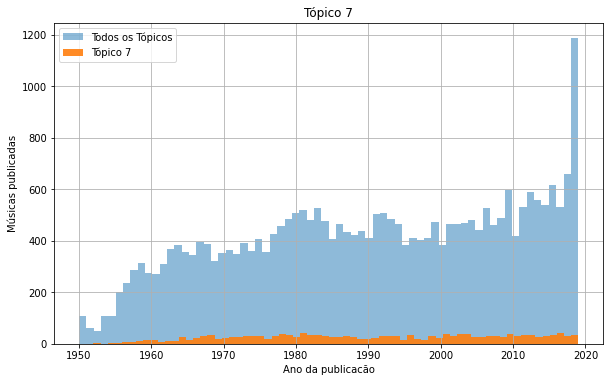

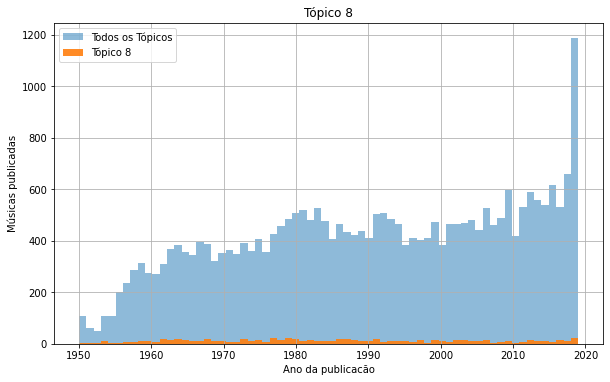

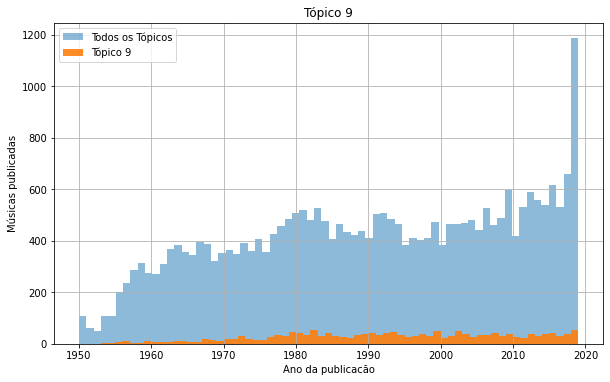

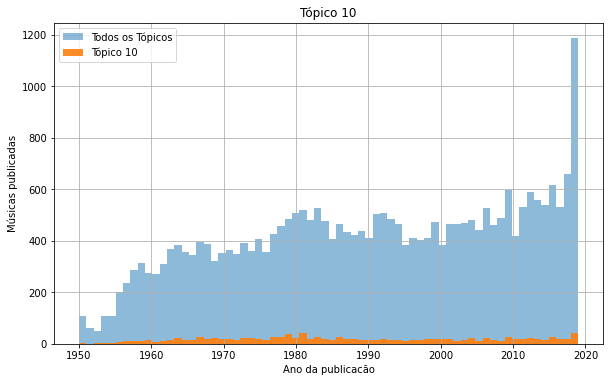

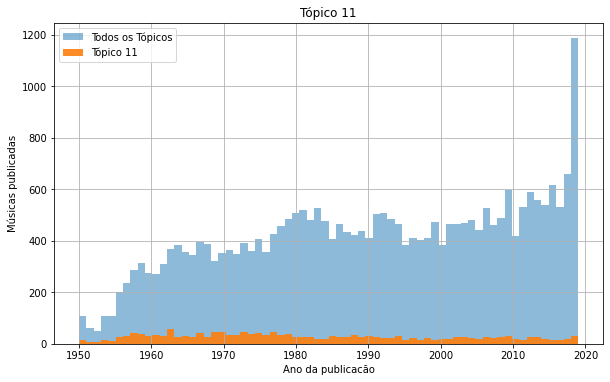

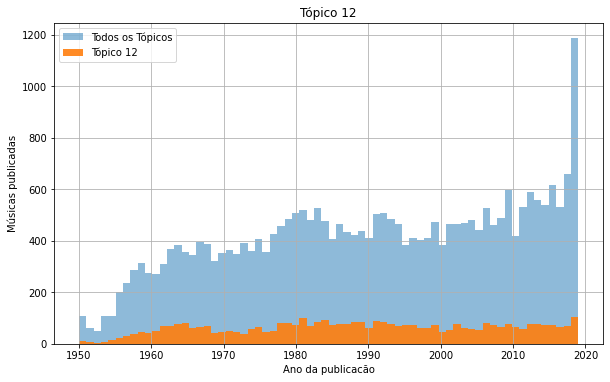

In [42]:
for i in range(len(topic_names)):
    plt.figure(figsize=(cm_to_inch(25), cm_to_inch(15)))
    data_set_topic = data_set[(data_set["topics"] == i)]
    data_set_topic = data_set_topic.loc[:,["topics","release_date"]]
    data_set["release_date"].plot.hist(grid=True, bins=68, alpha=0.5, label='Todos os Tópicos')
    data_set_topic["release_date"].plot.hist(grid=True, bins=68, alpha=0.9, label=f'Tópico {topic_names[i]}')
    plt.xlabel('Ano da publicacão')
    plt.ylabel('Músicas publicadas')
    plt.title(f'Tópico {topic_names[i]}')
    plt.legend()
    plt.savefig(f'plots/topico{topic_names[i]}.png')
    plt.show()
    




/home/gabriel/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


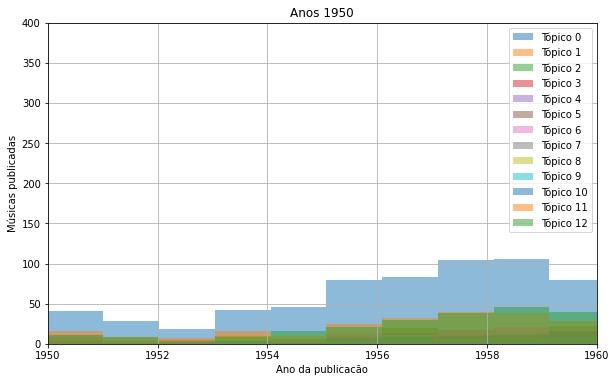

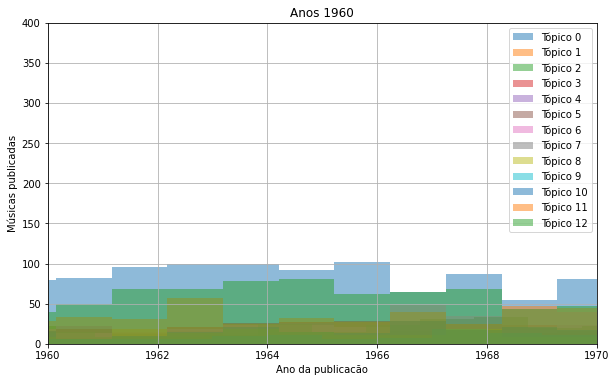

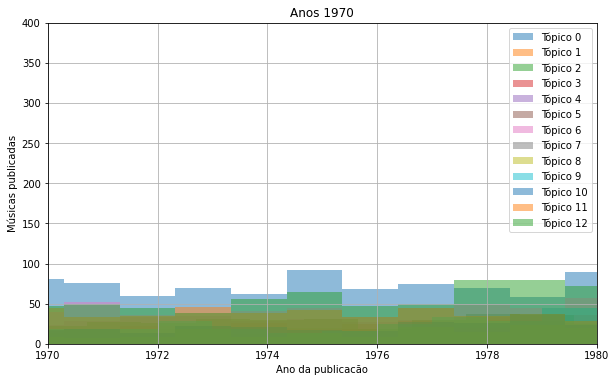

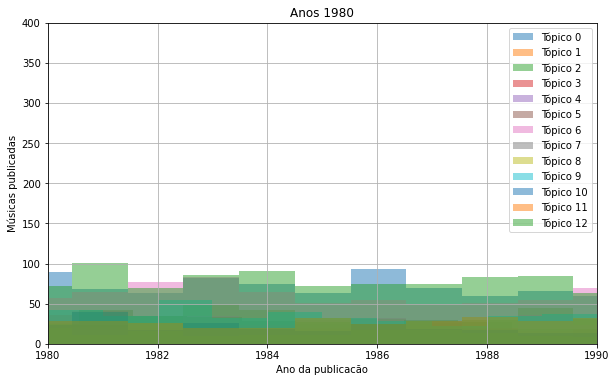

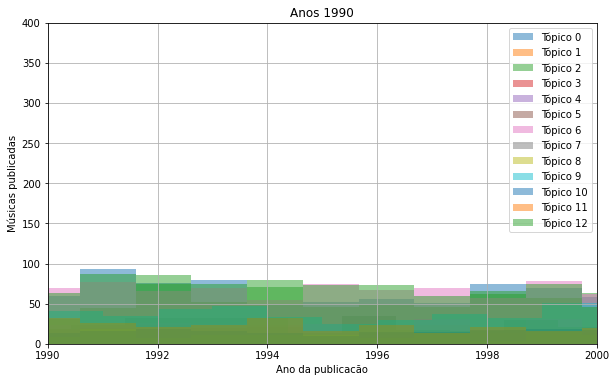

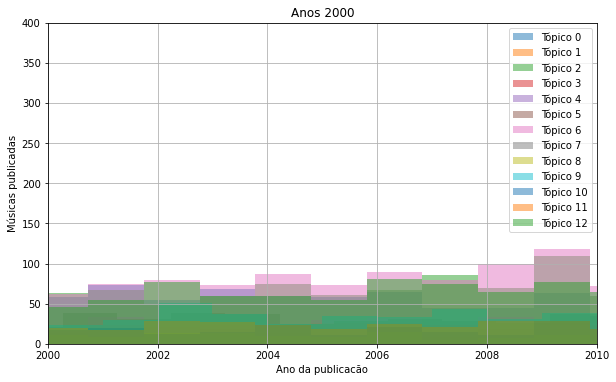

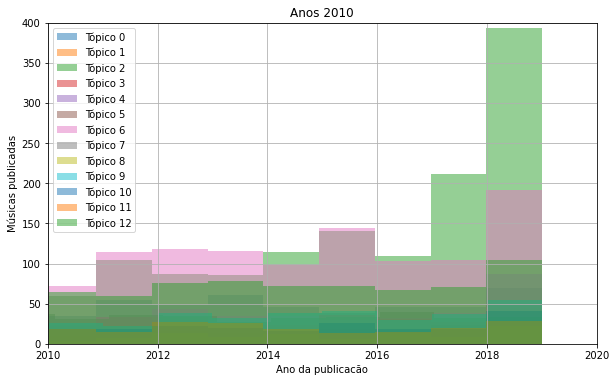

In [35]:
for i in range(len(decadas)):
    plt.figure(figsize=(cm_to_inch(25), cm_to_inch(15)))
    for j in range(len(topic_names)):

        data_set_topic = data_set[(data_set["topics"] == j)]
        data_set_topic = data_set_topic.loc[:,["topics","release_date"]]
        data_set_topic["release_date"].plot.hist(grid=True, bins=68, alpha=0.5, label=f'Tópico {topic_names[j]}')

    plt.xlabel('Ano da publicacão')
    plt.ylabel('Músicas publicadas')
    plt.title(f'Anos {decadas[i]}')
    
    # maxfreq = n.max()
    # # Set a clean upper y-axis limit.
    # plt.ylim(400)
    plt.legend()
    plt.axis([decadas[i], decadas[i]+10, 0, 400])
    plt.savefig(f'plots/anos{decadas[i]}.png')
    plt.show()

In [36]:
data_set[(data_set["genre"] == 'pop')].head()

/home/gabriel/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,processed_lyrics,topics
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,"[hold, time, feel, break, feel, untru, convinc...",12
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,"[believ, drop, rain, fall, grow, believ, darke...",0
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,"[sweetheart, send, letter, goodby, secret, fee...",0
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,"[kiss, lip, want, stroll, charm, mambo, chacha...",0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,"[till, darl, till, matter, know, till, dream, ...",0


In [37]:
data_set['genre'].unique()

/home/gabriel/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['pop', 'country', 'blues', 'jazz', 'reggae', 'rock', 'hip hop'],
      dtype=object)

In [38]:
data_set['genre'].size

/home/gabriel/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


28372

In [39]:
data_set.iloc[5000]

/home/gabriel/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Unnamed: 0                                                      14486
artist_name                                                  the used
track_name                                             poetic tragedy
release_date                                                     2002
genre                                                             pop
lyrics              half pessimists see leave indulge voice ambiti...
len                                                                49
processed_lyrics    [half, pessimist, see, leav, indulg, voic, amb...
topics                                                              9
Name: 5000, dtype: object